<a href="https://colab.research.google.com/github/Khasimbabu/DataScience_Projects/blob/main/ItemDemandForecasting_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Importing the libraries & Load the data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/train 2.csv')

In [3]:
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [4]:
df.columns

Index(['date', 'store', 'item', 'sales'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


**2. Data cleaning and Processing**

In [6]:
df.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.shape

(913000, 4)

In [9]:
# 15-01-2013
df1 = df
date = df1['date'].values
month = [my_str.split('-')[1] for my_str in date]
year = [my_str.split("-")[0] for my_str in date]
df1['month'] = month
df1['year'] = year

In [10]:
df1.columns

Index(['date', 'store', 'item', 'sales', 'month', 'year'], dtype='object')

In [11]:
df1.store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [12]:
df1.item.value_counts()

50    18260
13    18260
23    18260
22    18260
21    18260
20    18260
19    18260
18    18260
17    18260
16    18260
15    18260
14    18260
12    18260
49    18260
11    18260
10    18260
9     18260
8     18260
7     18260
6     18260
5     18260
4     18260
3     18260
2     18260
24    18260
25    18260
26    18260
27    18260
48    18260
47    18260
46    18260
45    18260
44    18260
43    18260
42    18260
41    18260
40    18260
39    18260
38    18260
37    18260
36    18260
35    18260
34    18260
33    18260
32    18260
31    18260
30    18260
29    18260
28    18260
1     18260
Name: item, dtype: int64

In [13]:
df1.store.value_counts()

10    91300
9     91300
8     91300
7     91300
6     91300
5     91300
4     91300
3     91300
2     91300
1     91300
Name: store, dtype: int64

In [14]:
df1.month.unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

In [15]:
df1.month

0         01
1         01
2         01
3         01
4         01
          ..
912995    12
912996    12
912997    12
912998    12
912999    12
Name: month, Length: 913000, dtype: object

In [16]:
df1['month']=[mon.lstrip('0') for mon in df1.month]

In [17]:
df1.month.unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'],
      dtype=object)

In [18]:
df1.shape

(913000, 6)

In [19]:
basket = df1.groupby(['month','store','item'])['sales'].sum()
# basket.head(10)

In [20]:
basket = basket.unstack()
basket.head()

item           1     2     3     4     5   ...    46    47    48    49    50
month store                                ...                              
1     1      2125  5591  3503  2101  1793  ...  5677  2071  4936  2803  6257
      2      2956  7865  5011  2924  2544  ...  7821  2969  6973  4020  8869
      3      2637  6963  4456  2642  2228  ...  6978  2631  6077  3502  7923
      4      2411  6463  4118  2440  2102  ...  6619  2460  5673  3280  7317
      5      1763  4753  2910  1692  1450  ...  4709  1778  4110  2322  5335

[5 rows x 50 columns]

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
 4   month   913000 non-null  object
 5   year    913000 non-null  object
dtypes: int64(3), object(3)
memory usage: 41.8+ MB


In [22]:
df1['month'] = df['month'].astype('int')
df1['year'] = df['year'].astype('int')

In [23]:
#***************** Each Item,Month,Year - Total item sum & sales sum *****************
df3 = df1.groupby(['item','month','year']).agg({'item': ['sum'],'sales': ['sum']}).reset_index()
#rename columns 
df3.columns = ['item','month','year','item_sum', 'sales_sum']
df3.head()

,item,month,year,item_sum,sales_sum
0,1,1,2013,310,3794
1,1,1,2014,310,4323
2,1,1,2015,310,4626
3,1,1,2016,310,5008
4,1,1,2017,310,5236


In [24]:
df3[df3['item']==1]

,item,month,year,item_sum,sales_sum
0,1,1,2013,310,3794
1,1,1,2014,310,4323
2,1,1,2015,310,4626
3,1,1,2016,310,5008
4,1,1,2017,310,5236
5,1,2,2013,280,3863
6,1,2,2014,280,4391
7,1,2,2015,280,4633
8,1,2,2016,290,5160
9,1,2,2017,280,5299


In [25]:
df3[(df3['item']==1) & (df3['month']<=3) & (df3['year']==2013)]

,item,month,year,item_sum,sales_sum
0,1,1,2013,310,3794
5,1,2,2013,280,3863
10,1,3,2013,310,5190


In [26]:
df4 = df3[(df3['item']==1) & (df3['month']<=3) & (df3['year']==2013)].agg({'item_sum': ['sum'],'sales_sum': ['sum']}).reset_index()
df4

,index,item_sum,sales_sum
0,sum,900,12847


In [27]:
df3.columns

Index(['item', 'month', 'year', 'item_sum', 'sales_sum'], dtype='object')

In [28]:
df_new1=pd.DataFrame()
df_new1

""


In [ ]:
#***************** For Each Each Year, All Items, 3 Months - Total item sum & sales sum *****************
def items_sold(yrno,itemno,monthno):
  if(monthno==3):
    df_new = df3[(df3['item']==itemno) & ((1 <= df3['month']) & (df3['month'] < 4)) & (df3['year']==yrno)].aggregate({'item_sum':['sum'],'sales_sum':['sum']})
  elif(monthno==6):
    df_new = df3[(df3['item']==itemno) & ((4 <= df3['month']) & (df3['month'] < 7)) & (df3['year']==yrno)].aggregate({'item_sum':['sum'],'sales_sum':['sum']})
  elif(monthno==9):
    df_new = df3[(df3['item']==itemno) & ((7 <= df3['month']) & (df3['month'] < 10)) & (df3['year']==yrno)].aggregate({'item_sum':['sum'],'sales_sum':['sum']})
  else:
    df_new = df3[(df3['item']==itemno) & ((10 <= df3['month']) & (df3['month'] <= 12)) & (df3['year']==yrno)].aggregate({'item_sum':['sum'],'sales_sum':['sum']})

  df_new['year']=yrno
  df_new['itemnum']=itemno
  df_new = pd.concat([df_new,df_new1])
  return df_new

yr_list = df3['year'].unique().tolist()
item_list = df3['item'].unique().tolist()
mon_list = df3['month'].unique().tolist()
for yr in yr_list:
  for item in item_list:
    for mon in mon_list:
      if(mon<=3):
        monthval=3
      elif(mon>3 and mon<=6):
        monthval=6
      elif(mon>6 and mon<=9):
        monthval=9
      else:monthval=12
      df_new1 = items_sold(yr,item,monthval)
df_new1
df_new1.sort_values(by ='year', ascending = 1)

In [30]:
df_new2 = df_new1.iloc[:,0:].reset_index()
df_new2.columns

Index(['index', 'item_sum', 'sales_sum', 'year', 'itemnum'], dtype='object')

In [31]:
df_new2.head()

,index,item_sum,sales_sum,year,itemnum
0,sum,46000,62925,2017,50
1,sum,46000,62925,2017,50
2,sum,46000,62925,2017,50
3,sum,46000,78899,2017,50
4,sum,46000,78899,2017,50


In [32]:
df_new2.drop(columns=['index'],inplace=True)

In [33]:
df_new2.head()

,item_sum,sales_sum,year,itemnum
0,46000,62925,2017,50
1,46000,62925,2017,50
2,46000,62925,2017,50
3,46000,78899,2017,50
4,46000,78899,2017,50


In [34]:
df_new2.drop_duplicates(inplace=True)

In [35]:
df_new2.head()

,item_sum,sales_sum,year,itemnum
0,46000,62925,2017,50
3,46000,78899,2017,50
6,45500,76149,2017,50
9,45000,51966,2017,50
12,45080,27934,2017,49


In [36]:
df_new3= df_new2[(df_new2['item_sum'] != 0) & (df_new2['sales_sum'] != 0)]
df_new3

,item_sum,sales_sum,year,itemnum
0,46000,62925,2017,50
3,46000,78899,2017,50
6,45500,76149,2017,50
9,45000,51966,2017,50
12,45080,27934,2017,49
...,...,...,...,...
2985,1800,34650,2013,2
2988,920,15764,2013,1
2991,920,19292,2013,1
2994,910,18820,2013,1


In [37]:
#***************** For Each Each Year, All Items - each record is for 3 Months - Total item sum & sales sum *****************
df_new3.sort_values(by ='year', ascending = 1)

,item_sum,sales_sum,year,itemnum
2997,900,12847,2013,1
2613,29700,40403,2013,33
2610,30030,59466,2013,33
2607,30360,61952,2013,33
2604,30360,49517,2013,33
...,...,...,...,...
387,16560,101330,2017,18
384,16560,81081,2017,18
381,17100,31996,2017,19
411,14720,30893,2017,16


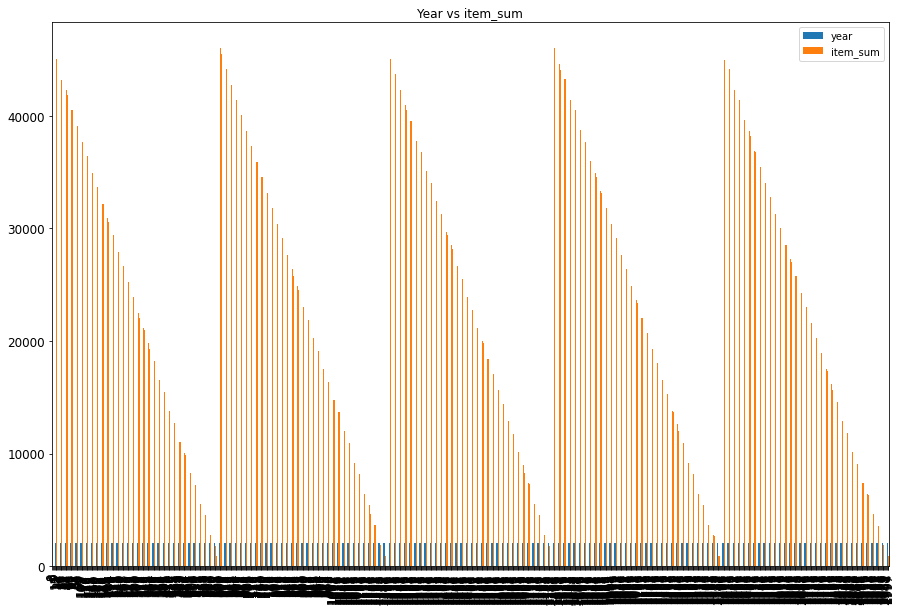

In [38]:
#df_new3.plot(kind='bar')
df_new3[['year','item_sum']].plot(kind='bar', title ="Year vs item_sum", figsize=(15, 10), legend=True, fontsize=12)

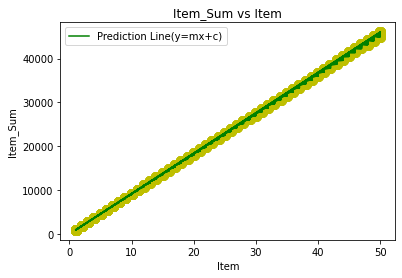

In [39]:
X = df_new3['itemnum'].values
y = df_new3['item_sum'].values
plt.scatter(X,y,label='',color='y',s=100)
plt.xlabel('Item')
plt.ylabel('Item_Sum')
plt.title('Item_Sum vs Item')
plt.plot(X,y, c='green',label='Prediction Line(y=mx+c)')
plt.legend()
plt.show()

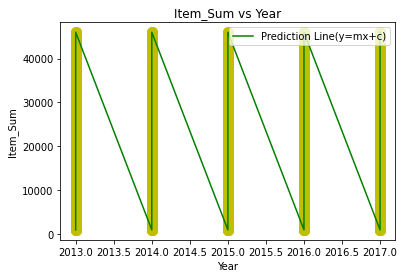

In [40]:
X = df_new3['year'].values
y = df_new3['item_sum'].values
plt.scatter(X,y,label='',color='y',s=100)
plt.xlabel('Year')
plt.ylabel('Item_Sum')
plt.title('Item_Sum vs Year')
plt.plot(X,y, c='green',label='Prediction Line(y=mx+c)')
plt.legend()
plt.show()

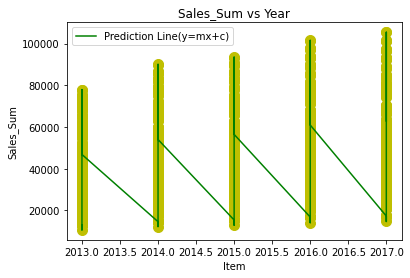

In [41]:
X = df_new3['year'].values
y = df_new3['sales_sum'].values
plt.scatter(X,y,label='',color='y',s=100)
plt.xlabel('Item')
plt.ylabel('Sales_Sum')
plt.title('Sales_Sum vs Year')
plt.plot(X,y, c='green',label='Prediction Line(y=mx+c)')
plt.legend()
plt.show()

**Split the Train and Test data**

In [42]:
df_new4 = df_new3.sort_values(['year','itemnum'], ascending = True)

In [43]:
df_new4

,item_sum,sales_sum,year,itemnum
2988,920,15764,2013,1
2991,920,19292,2013,1
2994,910,18820,2013,1
2997,900,12847,2013,1
2976,1840,41824,2013,2
...,...,...,...,...
21,44100,23360,2017,49
0,46000,62925,2017,50
3,46000,78899,2017,50
6,45500,76149,2017,50


In [44]:
X =  df_new4[['year','itemnum']]
X.head()

,year,itemnum
2988,2013,1
2991,2013,1
2994,2013,1
2997,2013,1
2976,2013,2


In [45]:
y = df_new4['item_sum']

**Model Selection**

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
reg = model.fit(X_train,y_train)
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [47]:
from sklearn.metrics import r2_score
test_score = r2_score(y_test,y_pred_test)
train_score = r2_score(y_train,y_pred_train)
print(test_score)
print(train_score)

0.9996737648064531
0.9997079622393203


In [48]:
reg.coef_

array([  9.3310307, 913.5774789])

In [49]:
reg.intercept_

-18811.58779373757

In [50]:
reg.predict(np.array([[2013,1]]))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([885.35449295])

In [51]:
model.predict([[2013,1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([885.35449295])

In [52]:
model.predict([[2013,2]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1798.93197185])

In [53]:
# Year 2021 Three months Item 1 - ItemSum value
model.predict([[2021,1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([960.00273858])

In [54]:
# Year 2021 Three months Item 2 - ItemSum value
model.predict([[2021,2]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1873.58021749])